<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **Project Goal:**

The primary objective of this project is to develop innovative predictive techniques that not only classify patients based on their risk of heart disease using multiple medical indicators but also employ clustering techniques to uncover distinct patient profiles. By integrating these approaches, the project aims to provide healthcare professionals with actionable insights that enhance early detection and personalized prevention strategies, ultimately contributing to improved cardiovascular health outcomes.

# **Dataset Source:**

The dataset was obtained from kaggle.com
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

# **Dataset Description**

In [18]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(["#ffb6c1", "#ff69b4"])
df = pd.read_csv("/content/heart.csv")

***Features:***
Number and data types of attirbutes


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


***Number of Objects:***
Based on the dataset there are 918 rows and 12 columns.

In [ ]:
print(f"- Rows (instances): {df.shape[0]}")
print(f"- Columns (features): {df.shape[1]}")

- Rows (instances): 918
- Columns (features): 12


***Class Distribution:***
From our class label (heart disease) there are 410 patients with no heart disease and 508 patients with heart disease.


In [ ]:
print("Target Column (class attribute): HeartDisease")
count_0 = df[df["HeartDisease"] == 0].shape[0]
count_1 = df[df["HeartDisease"] == 1].shape[0]
print(f"- Patients with NO heart disease (0): {count_0}")
print(f"- Patients WITH heart disease (1): {count_1}")


Target Column (class attribute): HeartDisease
- Patients with NO heart disease (0): 410
- Patients WITH heart disease (1): 508


***Dataset Sample:***
sample of the raw dataset.

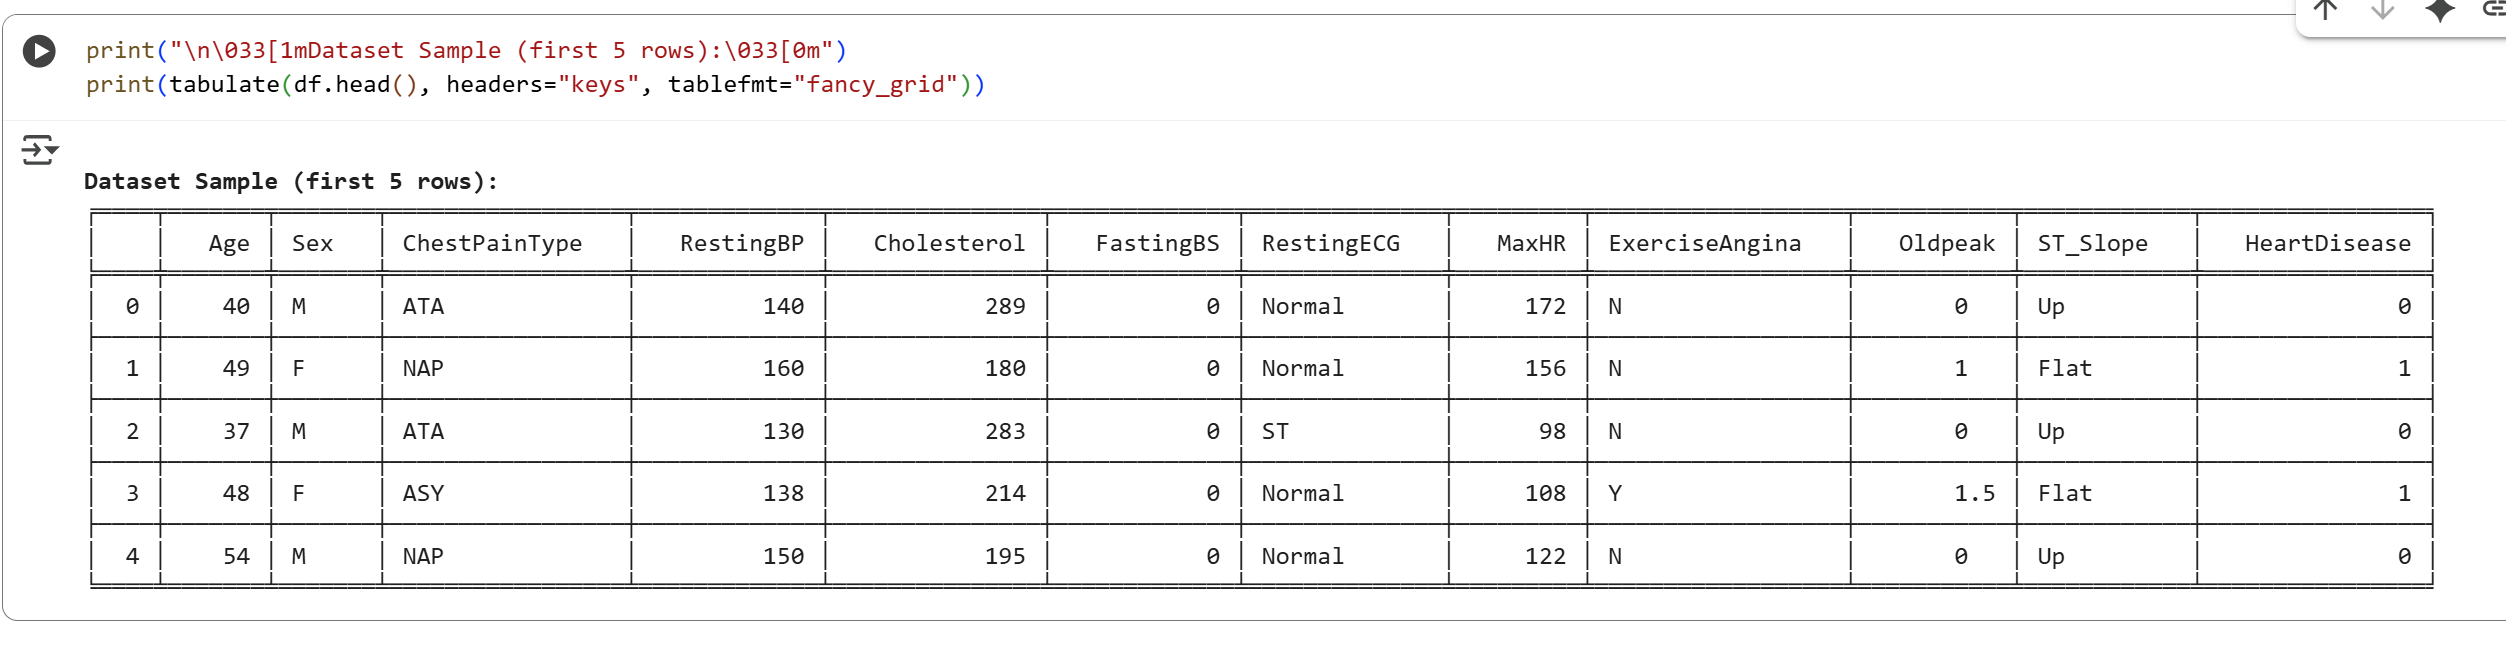

In [ ]:
from IPython.display import Image, display

display(Image("/content/dataset.png"))

*We displayed the table as a photo for a better represntaiton*

In [ ]:
print("\n\033[1mDataset Sample (first 5 rows):\033[0m")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


Dataset Sample (first 5 rows):
╒════╤═══════╤═══════╤═════════════════╤═════════════╤═══════════════╤═════════════╤══════════════╤═════════╤══════════════════╤═══════════╤════════════╤════════════════╕
│    │   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
╞════╪═══════╪═══════╪═════════════════╪═════════════╪═══════════════╪═════════════╪══════════════╪═════════╪══════════════════╪═══════════╪════════════╪════════════════╡
│  0 │    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
├────┼───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│  1 │    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N  

## ***Phase 2:***

**Statistic summery:**

In [4]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Age:** Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

**RestingBP:** The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**Cholesterol:** The majority of patients (IQR: 173 to 267) fall within normal (<200) to borderline high (>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**FastingBS:** Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

**MaxHR:** Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.

**Oldpeak:** The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

**HeartDisease:** The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.

# **Outlier:**

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [11]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
RestingBP: 28 outliers
Cholesterol: 183 outliers
FastingBS: 214 outliers
MaxHR: 2 outliers
Oldpeak: 16 outliers
HeartDisease: 0 outliers


# **Box plot:**

/tmp/ipython-input-375178904.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y=col, data=df, palette=palette)
/tmp/ipython-input-375178904.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y=col, data=df, palette=palette)
/tmp/ipython-input-375178904.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y=col, data=df, palette=palette)
/tmp/ipython-input-375178904.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

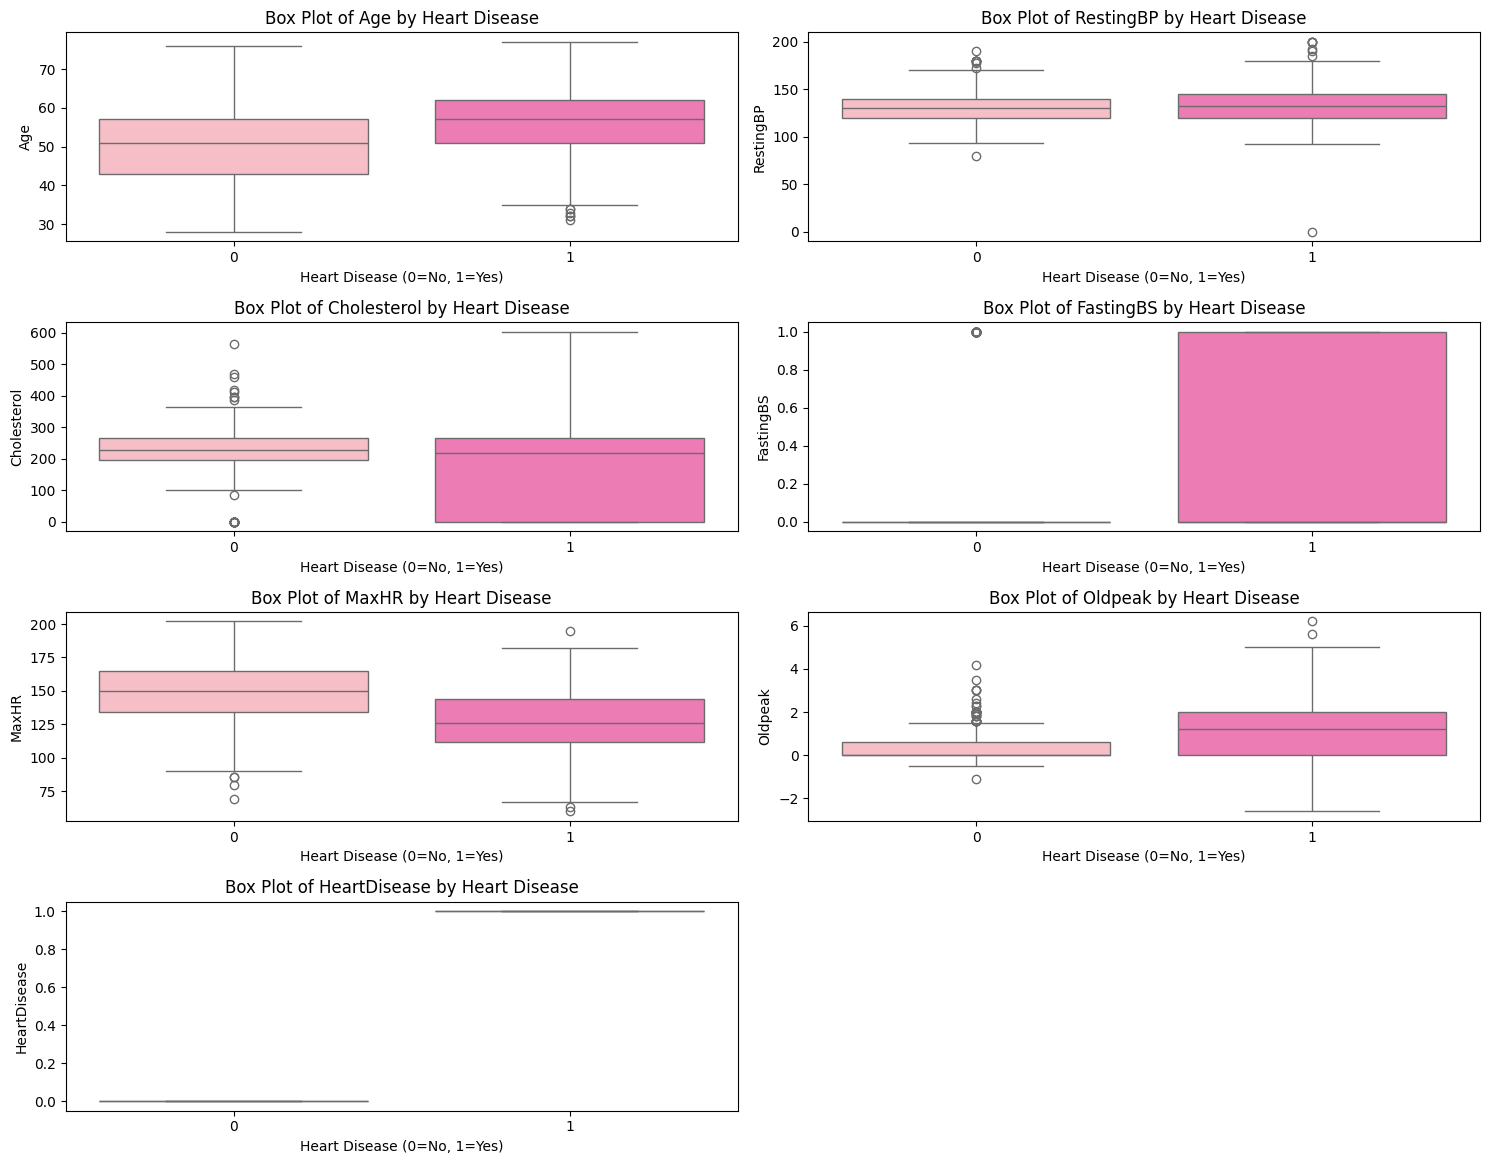

In [13]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

palette = ["#ffb6c1", "#ff69b4"]


plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.boxplot(x="HeartDisease", y=col, data=df, palette=palette)
    plt.title(f"Box Plot of {col} by Heart Disease", fontsize=12)
    plt.xlabel("Heart Disease (0=No, 1=Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Box Plot Analysis of Heart Disease Predictors**

The box plots illustrate key predictors of heart disease (0 = No, 1 = Yes):

1. **Age**: Individuals with heart disease have a median age of around 58, while those without heart disease  have a lower median age of approximately 52, indicating that heart disease is more prevalent in older populations.

2. **Resting Blood Pressure (RestingBP)**: Those with heart disease show a wider range and more outliers in RestingBP, suggesting that elevated blood pressure may significantly contribute to heart disease risk.

3. **Cholesterol**: Higher cholesterol levels are observed in individuals with heart disease, indicating that high cholesterol is a potential risk factor, particularly in those aged 50 and above.

4. **Fasting Blood Sugar (FastingBS)**: Fasting blood sugar is a strong indicator of heart disease; nearly all individuals without heart disease exhibit low fasting blood sugar, while those with heart disease typically show higher levels.

5. **MaxHR**: The median MaxHR for individuals without heart disease is around 155 bpm, with values concentrated between 130 and 165 bpm. In contrast, those with heart disease have a lower median MaxHR of about 140 bpm, displaying greater variability and more outliers, which suggests that lower MaxHR is associated with heart disease.

# **Scatter Plot:**

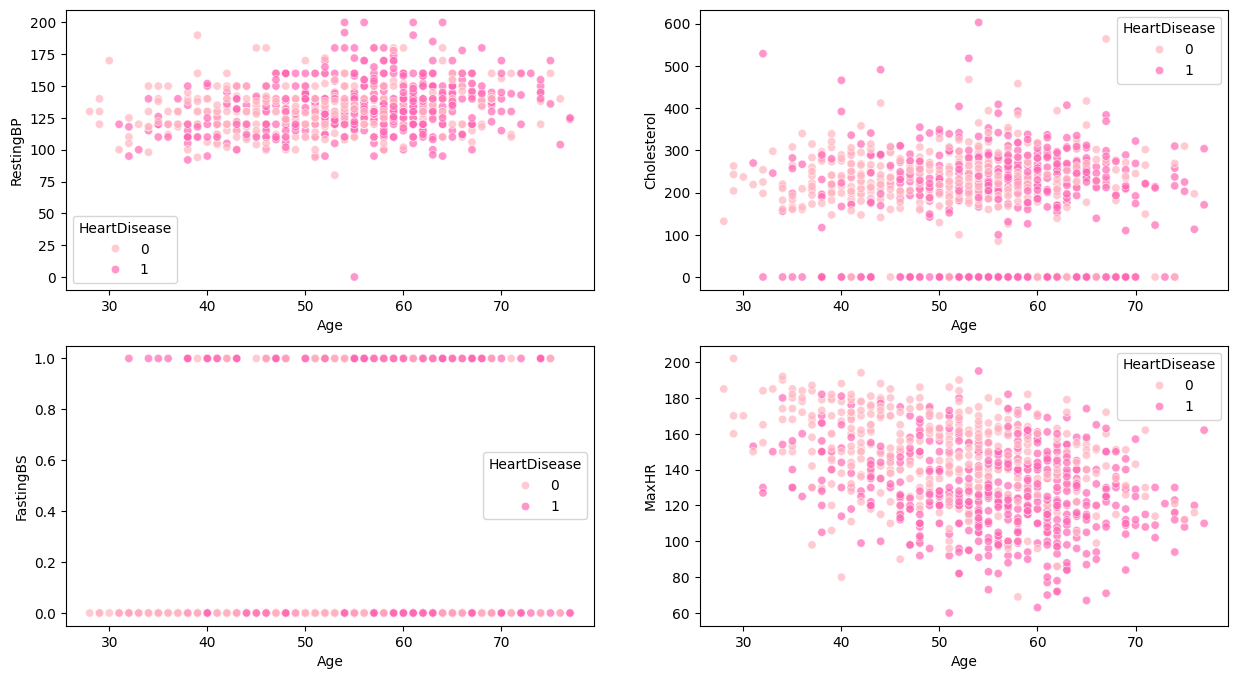

In [21]:
data = pd.read_csv('heart.csv')
fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=data,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()


MaxHR and FastingBS stand out as key predictors of heart disease across all age categories. Patients with heart disease generally present with lower MaxHR values, while elevated fasting blood sugar (FastingBS = 1) appears more frequently in this group.

In older age groups, Cholesterol and RestingBP gain greater significance in detecting heart disease:
	•	Cholesterol: Higher cholesterol levels are more often seen in individuals aged 50 and above with heart disease, whereas this pattern is less pronounced in younger groups.
	•	RestingBP: Elevated RestingBP values are observed more frequently in heart disease patients, particularly between ages 50 and 70, emphasizing its rising relevance with age.

Meanwhile, FastingBS consistently shows a strong link to heart disease across all age brackets, regardless of other variables.

# **Histogram**

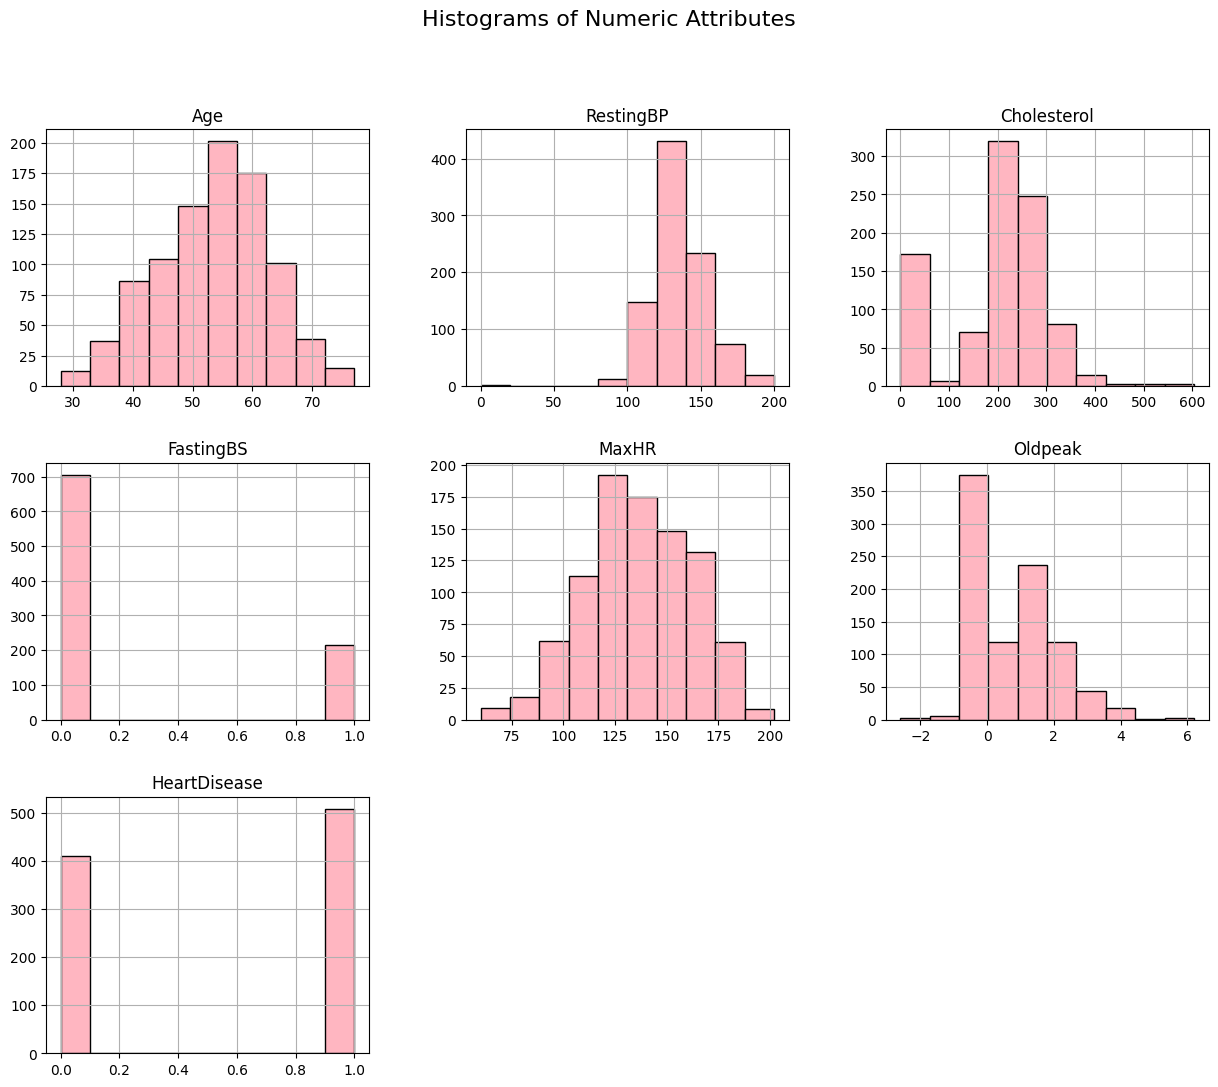

In [22]:
df[numeric_cols].hist(figsize=(15, 12), edgecolor="black")
plt.suptitle("Histograms of Numeric Attributes", fontsize=16, color="black")
plt.show()


**Histogram Insights**

**Age:** Most patients fall between 50–60 years. Heart disease cases are more common in middle-aged and older groups, highlighting age as a major risk factor.

**RestingBP:**  While most values cluster between 120–140, elevated blood pressure is more frequently observed in patients with heart disease, especially in the 50–70 age range.

**Cholesterol:** Higher cholesterol levels (>250) are more often associated with heart disease in patients above 50, though this trend is weaker in younger individuals.

**FastingBS:** Patients with fasting blood sugar = 1 are consistently more likely to have heart disease, regardless of age, making it a strong predictor.

**MaxHR:** Individuals with heart disease generally achieve lower maximum heart rates, whereas higher MaxHR values are more common in those without the condition.

**Oldpeak:** Greater ST depression values (above 2) are more common among patients with heart disease, reflecting stronger exercise-induced abnormalities.

**HeartDisease:** The target variable is relatively balanced, with a slightly higher number of patients diagnosed with the disease, making the dataset suitable for classification.

**Overall:**
MaxHR and FastingBS stand out as strong predictors across all ages. RestingBP and Cholesterol become more significant in older groups, while Oldpeak adds further diagnostic value in detecting exercise-related abnormalities.

# **Bar Chart:**

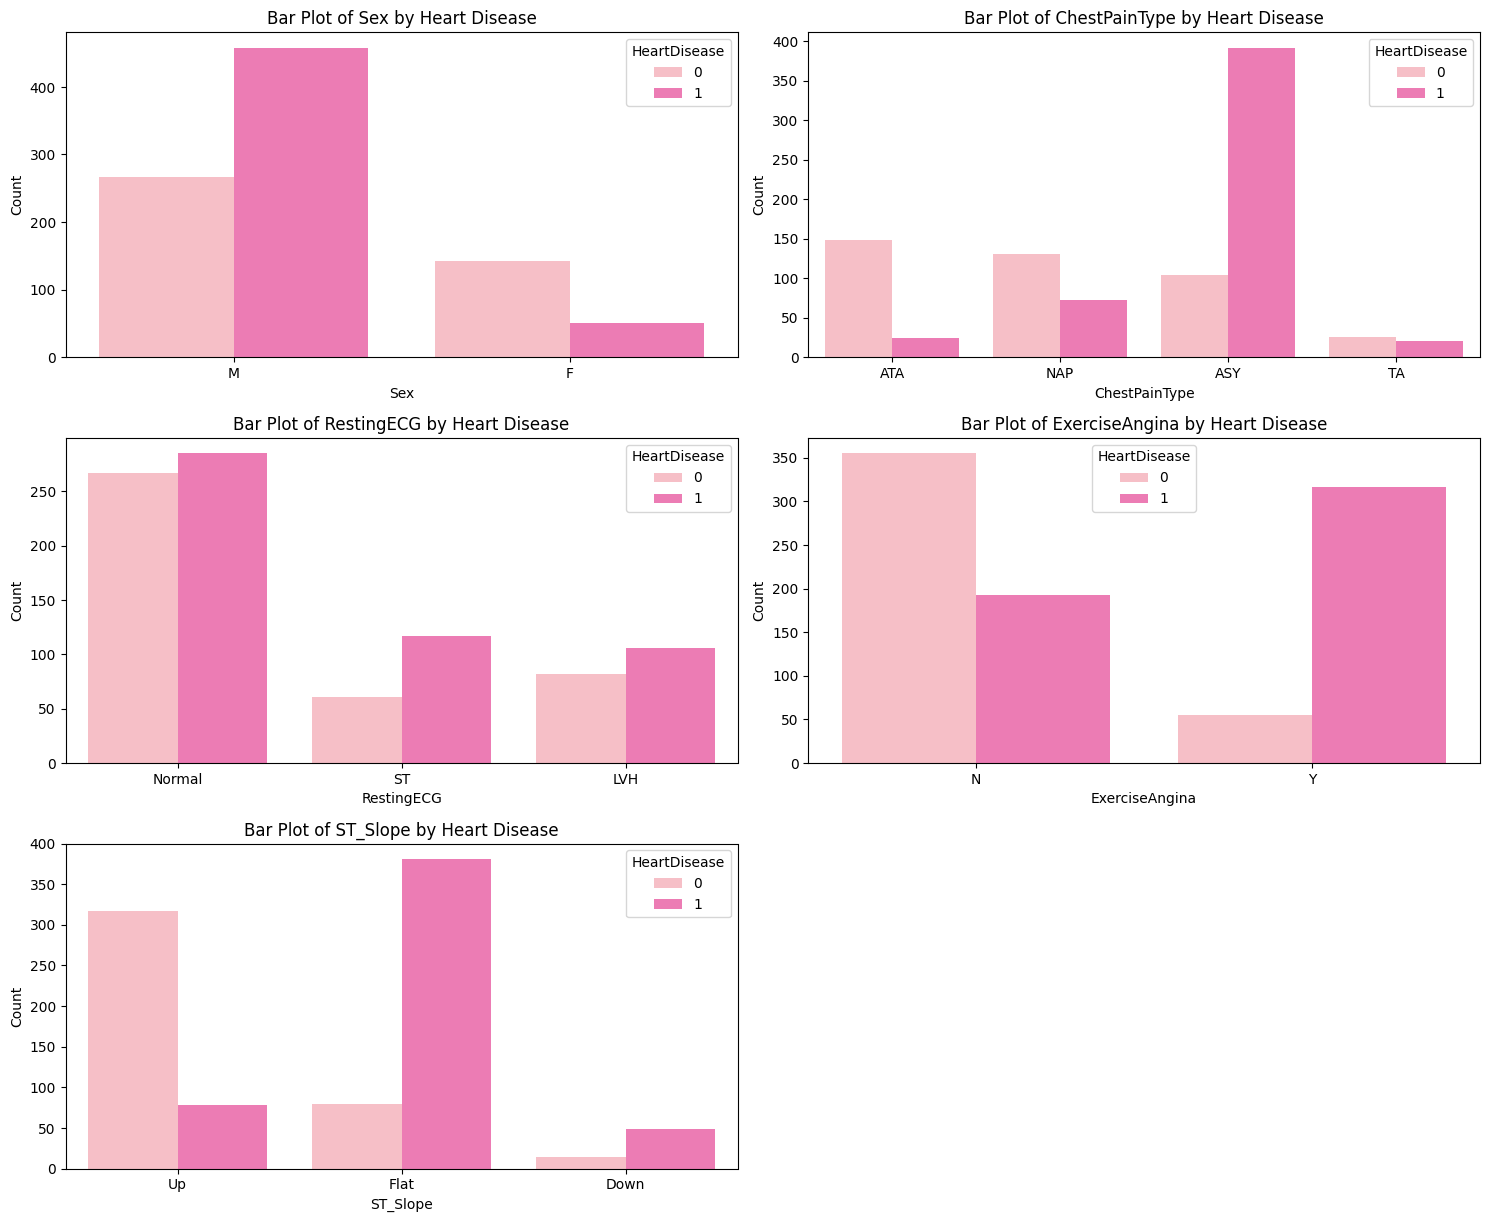

In [23]:
categorical_cols = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=col, hue="HeartDisease", data=df)
    plt.title(f"Bar Plot of {col} by Heart Disease", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

HeartDisease emerges as a central outcome variable in the dataset. Patients with a positive diagnosis (HeartDisease = 1) appear more frequently than those without the condition (HeartDisease = 0).

**Distribution:** The majority class consists of individuals with heart disease, while the minority group represents those without the disease.

**Impact:** This imbalance highlights a potential modeling challenge, as algorithms may become biased toward predicting the majority class.

**Preprocessing implication:** Techniques such as resampling (oversampling/undersampling) or class weight adjustment may be required to balance the dataset and improve model performance.